## BlackSheep Cookbook

The Black Sheep Analysis allows researchers to find trends in abnormal protein enrichment among patients in CPTAC datasets. In this Cookbook, we will go through the steps needed to perform a full Black Sheep Analysis, to answer a research question, of if BMI, age, or country of origin play a role in protein enrichments for patients with Endometrial Cancer.

### Step 1a: Import Dependencies and Choose Omics Table
First, import the necessary dependencies and install cptac through pip.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install cptac
import cptac
import binarization_functions as bf
import blackSheepCPTACmoduleCopy as blsh
import importlib
importlib.reload(bf)
importlib.reload(blsh)

Welcome to the cptac data service package. To view available datasets,
enter cptac.list_data(). To access a specific data set, load the
dataset and assign it to a variable using 'cptac.NameOfDataset()',
e.g. 'en = cptac.Endometrial()'
******
Version: 0.5.0
******


<module 'blackSheepCPTACmoduleCopy' from 'C:\\Users\\Daniel\\Documents\\GitHub\\WhenMutationsMatter\\Daniel\\blackSheepCPTACmoduleCopy.py'>

## Step 1b: Load Data and Choose Omics Table

In [3]:
en = cptac.Endometrial()
proteomics = en.get_proteomics()
transcriptomics = en.get_transcriptomics()
clinical = en.get_clinical()

You have loaded the cptac endometrial dataset. To view available
dataframes, call the dataset's list_data() method. To view available
functions for accessing and manipulating the dataframes, call its
list_api() method.
endometrial data version: 2.1

Loading acetylproteomics data...
Loading clinical data...
Loading CNA data...
Loading definitions data...
Loading miRNA data...
Loading phosphoproteomics_gene data...
Loading phosphoproteomics_site data...
Loading proteomics data...
Loading somatic data...
Loading somatic_binary data...
Loading transcriptomics_circular data...
Loading transcriptomics_linear data...

Loading definitions...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter cptac.embarg

In [33]:
df= en.get_derived_molecular()
l = list(df.columns)

important_things_to_append = ['Genomics_subtype', 'MSI_status']

In [35]:
df['MSI_status']

Sample_ID
S001    MSI-H
S002    MSI-H
S003      MSS
S005      MSS
S006      MSS
S007      MSS
S008      MSS
S009      MSS
S010    MSI-H
S011      MSS
S012      MSS
S014    MSI-H
S016      MSS
S017    MSI-H
S018      MSS
S019      MSS
S020      MSS
S021      MSS
S022      MSS
S023      MSS
S024      MSS
S025      MSS
S026      MSS
S027      MSS
S028      MSS
S029      MSS
S030    MSI-H
S031      MSS
S032    MSI-H
S033      MSS
        ...  
S124      NaN
S125      NaN
S126      NaN
S127      NaN
S128      NaN
S129      NaN
S130      NaN
S131      NaN
S132      NaN
S133      NaN
S134      NaN
S135      NaN
S136      NaN
S137      NaN
S138      NaN
S139      NaN
S140      NaN
S141      NaN
S142      NaN
S143      NaN
S144      NaN
S145      NaN
S146      NaN
S147      NaN
S148      NaN
S149      NaN
S150      NaN
S151      NaN
S152      NaN
S153      NaN
Name: MSI_status, Length: 144, dtype: object

## Step 2: Determine what attributes you would like to A/B test. 
In this case, we will test for country of origin, BMI, age, and histologic type.

In [4]:
#Create a subset copy of the original Clinical DataFrame. 
annotations = clinical[['Country', 'BMI', 'Age', 'Histologic_type']].copy()

#Create a dictionary to map replace countries into two options: US or Other
#Key = country to replace
#Value = replacement for key
dictionary_map = {'United States':'US', 
              'Ukraine':'Other', 
              'Other_specify':'Other', 
              'Poland':'Other'}

#Using the functions to binarize various different columns
#NOTE: Histologic_type is already binary, and does not need to be binarized
annotations['Country'] = bf.binarizeCategorical(clinical, 'Country', dictionary_map)
annotations['BMI'] = bf.binarizeRange(clinical, 'BMI', 18, 25, 'Healthy', 'Unhealthy')
annotations['Age'] = bf.binarizeCutOff(clinical, 'Age', 60.0, 'Old', 'Young')

In [ ]:
#This cell is for reference so that I don't have to keep looking up which columns
#in the clinical dataset are binary and which aren't for testing.

non_binary_columns = ['Country', 'Histologic_Grade_FIGO', 
                      'Proteomics_Tumor_Normal', 'Myometrial_invasion_Specify', 
                      'Path_Stage_Primary_Tumor-pT', 'Path_Stage_Reg_Lymph_Nodes-pN', 
                      'Clin_Stage_Dist_Mets-cM', 'Path_Stage_Dist_Mets-pM', 
                      'tumor_Stage-Pathological', 'FIGO_stage', 'BMI', 'Age', 'Race', 
                      'Ethnicity', 'Tumor_Site', 'Tumor_Site_Other', 'Tumor_Size_cm', 
                      'Num_full_term_pregnancies']

already_binary_columns = ['Treatment_naive', 'Diabetes', 'Gender', 
                          'Tumor_Focality', 'Histologic_type', 
                          'Tumor_purity', 'LVSI']

## Step 3: Perform outliers analysis

In [5]:
outliers = blsh.make_outliers_table(transcriptomics, iqrs=2.0, 
                                  up_or_down='up', aggregate=False, 
                                  frac_table=False)

## Step 4: Wrap your A/B test into the outliers analysis, and create a table

In [6]:
results = blsh.compare_groups_outliers(outliers, annotations, frac_filter=.1)

Testing 912 rows for enrichment in Country Other samples
Testing 1140 rows for enrichment in Country US samples
Testing 1368 rows for enrichment in BMI Unhealthy samples
Testing 4634 rows for enrichment in BMI Healthy samples
Testing 1122 rows for enrichment in Age Old samples
Testing 812 rows for enrichment in Age Young samples
Testing 934 rows for enrichment in Histologic_type Endometrioid samples
Testing 3102 rows for enrichment in Histologic_type Serous samples


## Step 5: Visualize these enrichments

In [7]:
results.head()

Country_Other_enrichment_FDR  Country_US_enrichment_FDR  \
A1BG                               NaN                        NaN   
A1BG-AS1                           NaN                        NaN   
A1CF                               NaN                        NaN   
A2M                                NaN                        NaN   
A2M-AS1                            NaN                        NaN   

          BMI_Unhealthy_enrichment_FDR  BMI_Healthy_enrichment_FDR  \
A1BG                               NaN                    0.268385   
A1BG-AS1                           NaN                         NaN   
A1CF                               NaN                    0.430242   
A2M                                NaN                         NaN   
A2M-AS1                            NaN                         NaN   

          Age_Old_enrichment_FDR  Age_Young_enrichment_FDR  \
A1BG                         NaN                       NaN   
A1BG-AS1                     NaN                       NaN   
A1CF                         NaN                       NaN   
A2M                          NaN                       NaN   
A2M-AS1                      NaN                       NaN   

          Histologic_type_Endometrioid_enrichment_FDR  \
A1BG                                              NaN   
A1BG-AS1                                          NaN   
A1CF                                              NaN   
A2M                                               NaN   
A2M-AS1                                           NaN   

          Histologic_type_Serous_enrichment_FDR  
A1BG                                        NaN  
A1BG-AS1                                    NaN  
A1CF                                   0.154195  
A2M                                         NaN  
A2M-AS1                                     NaN

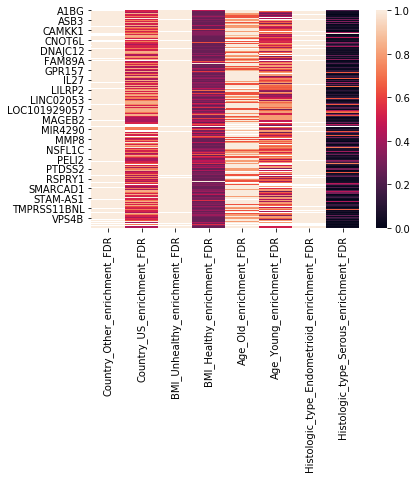

In [8]:
sns.heatmap(results)
plt.show()

## Step 6: Determine significant enrichments, and link with cancer drug database.
Here we see significant enrichments for serous-type tumors (p-value=0.001).

In [31]:
sig_results = significantEnrichments(results, 'Histologic_type_Serous_enrichment_FDR', 0.001)

There are 62 significant proteins from 28057 proteins regarding Histologic_type_Serous:



In [32]:
sig_results

Histologic_type_Serous_P_values
AAR2                              0.000544
AATF                              0.000108
AKAP4                             0.000401
ANKLE1                            0.000544
ANKRD27                           0.000719
CDK5RAP1                          0.000132
CTCFL                             0.000962
DDX25                             0.000719
EIF5                              0.000132
FSD1                              0.000108
GID8                              0.000019
GRB7                              0.000019
ISYNA1                            0.000132
KCNK9                             0.000108
KCNT1                             0.000019
KLHL11                            0.000132
L1CAM                             0.000108
LINC00470                         0.000108
LINC01257                         0.000544
LINC01446                         0.000719
MAGEF1                            0.000469
MED1                              0.000544
MIEN1                             0.000544
MRPL4                             0.000719
MRPL45                            0.000719
MTRNR2L6                          0.000544
NPBWR2                            0.000052
OPA1                              0.000108
OR13H1                            0.000544
PARL                              0.000108
...                                    ...
PNO1                              0.000719
POLDIP2                           0.000719
PRKCSH                            0.000719
PRPF6                             0.000006
PRR20A                            0.000544
PRR20B                            0.000544
PRR20C                            0.000544
PRR20D                            0.000544
PRR20E                            0.000544
PRSS3P2                           0.000132
PSMD3                             0.000019
RBM42                             0.000544
RFT1                              0.000962
RNF26                             0.000719
RPRD1B                            0.000719
SENP2                             0.000719
SLC4A1AP                          0.000108
SNORA31B                          0.000401
SOX11                             0.000132
SS18L1                            0.000719
ST8SIA3                           0.000962
SUPT6H                            0.000719
SYNRG                             0.000132
TAF1B                             0.000544
TBC1D31                           0.000719
TMEM199                           0.000719
TMEM41A                           0.000015
TPD52L2                           0.000108
TUBB4A                            0.000065
USP32                             0.000719

[62 rows x 1 columns]